In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

Idea sacada de curso de FastAI: https://course.fast.ai/lessons/lesson1.html 

# Cargamos dataset

In [16]:
! wget http://files.fast.ai/data/dogscats.zip

--2018-11-10 17:26:45--  http://files.fast.ai/data/dogscats.zip
Resolviendo files.fast.ai (files.fast.ai)... 67.205.15.147
Conectando con files.fast.ai (files.fast.ai)[67.205.15.147]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 857214334 (818M) [application/zip]
Guardando como: “dogscats.zip”

dogscats.zip        100%[===================>] 817,50M   430KB/s    en 18m 0s  

2018-11-10 17:44:45 (775 KB/s) - “dogscats.zip” guardado [857214334/857214334]



In [24]:
! unzip dogscats.zip

In [2]:
! ls

1_dogs_vs_cats.ipynb  dogscats	dogscats.zip


In [3]:
path = './dogscats'

In [4]:
! ls {path}

models	sample	test1  train  valid


### ¿Train set, Validation set, test set?
Analizar la estructura de las carpetas y discutir sobre conjuntos de entrenamiento

In [5]:
! ls {path}/valid

cats  dogs


In [6]:
files = ! ls {path}/valid/cats 

In [7]:
files[:10]

['cat.10016.jpg',
 'cat.1001.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

# Mostramos una imagen de ejemplo

In [8]:
from matplotlib import pyplot as plt

In [9]:
path+'/valid/cats/'+files[0]

'./dogscats/valid/cats/cat.10016.jpg'

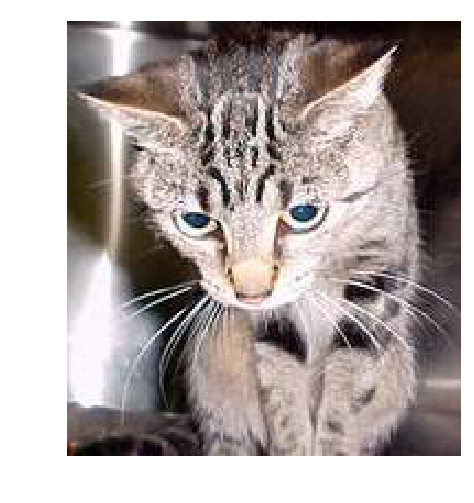

In [10]:
image = plt.imread(path+'/valid/cats/'+files[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Estructura del tensor Image
tensores vs matrices vs vectores

In [11]:
# Tensor de rango 3
image.shape

(198, 179, 3)

In [12]:
image

array([[[29, 20, 23],
        [31, 22, 25],
        [34, 25, 28],
        ...,
        [21,  8,  2],
        [21,  8,  2],
        [21,  8,  2]],

       [[60, 51, 54],
        [58, 49, 52],
        [56, 47, 50],
        ...,
        [21,  8,  2],
        [21,  8,  2],
        [21,  8,  2]],

       [[93, 84, 87],
        [89, 80, 83],
        [85, 76, 79],
        ...,
        [22,  9,  3],
        [22,  9,  3],
        [22,  9,  3]],

       ...,

       [[54,  7,  0],
        [71, 27, 16],
        [83, 45, 34],
        ...,
        [78, 66, 70],
        [78, 66, 70],
        [78, 66, 70]],

       [[46,  2,  0],
        [70, 28, 16],
        [75, 38, 29],
        ...,
        [71, 59, 63],
        [71, 59, 63],
        [71, 59, 63]],

       [[51,  9,  0],
        [72, 32, 22],
        [65, 31, 21],
        ...,
        [67, 55, 59],
        [67, 55, 59],
        [67, 55, 59]]], dtype=uint8)

Detalles:
- (alto, ancho, profundidad)
- Profundidad 3: Tipicamente RGB
- Escala de grises profundidad 1
- dtype=uint8

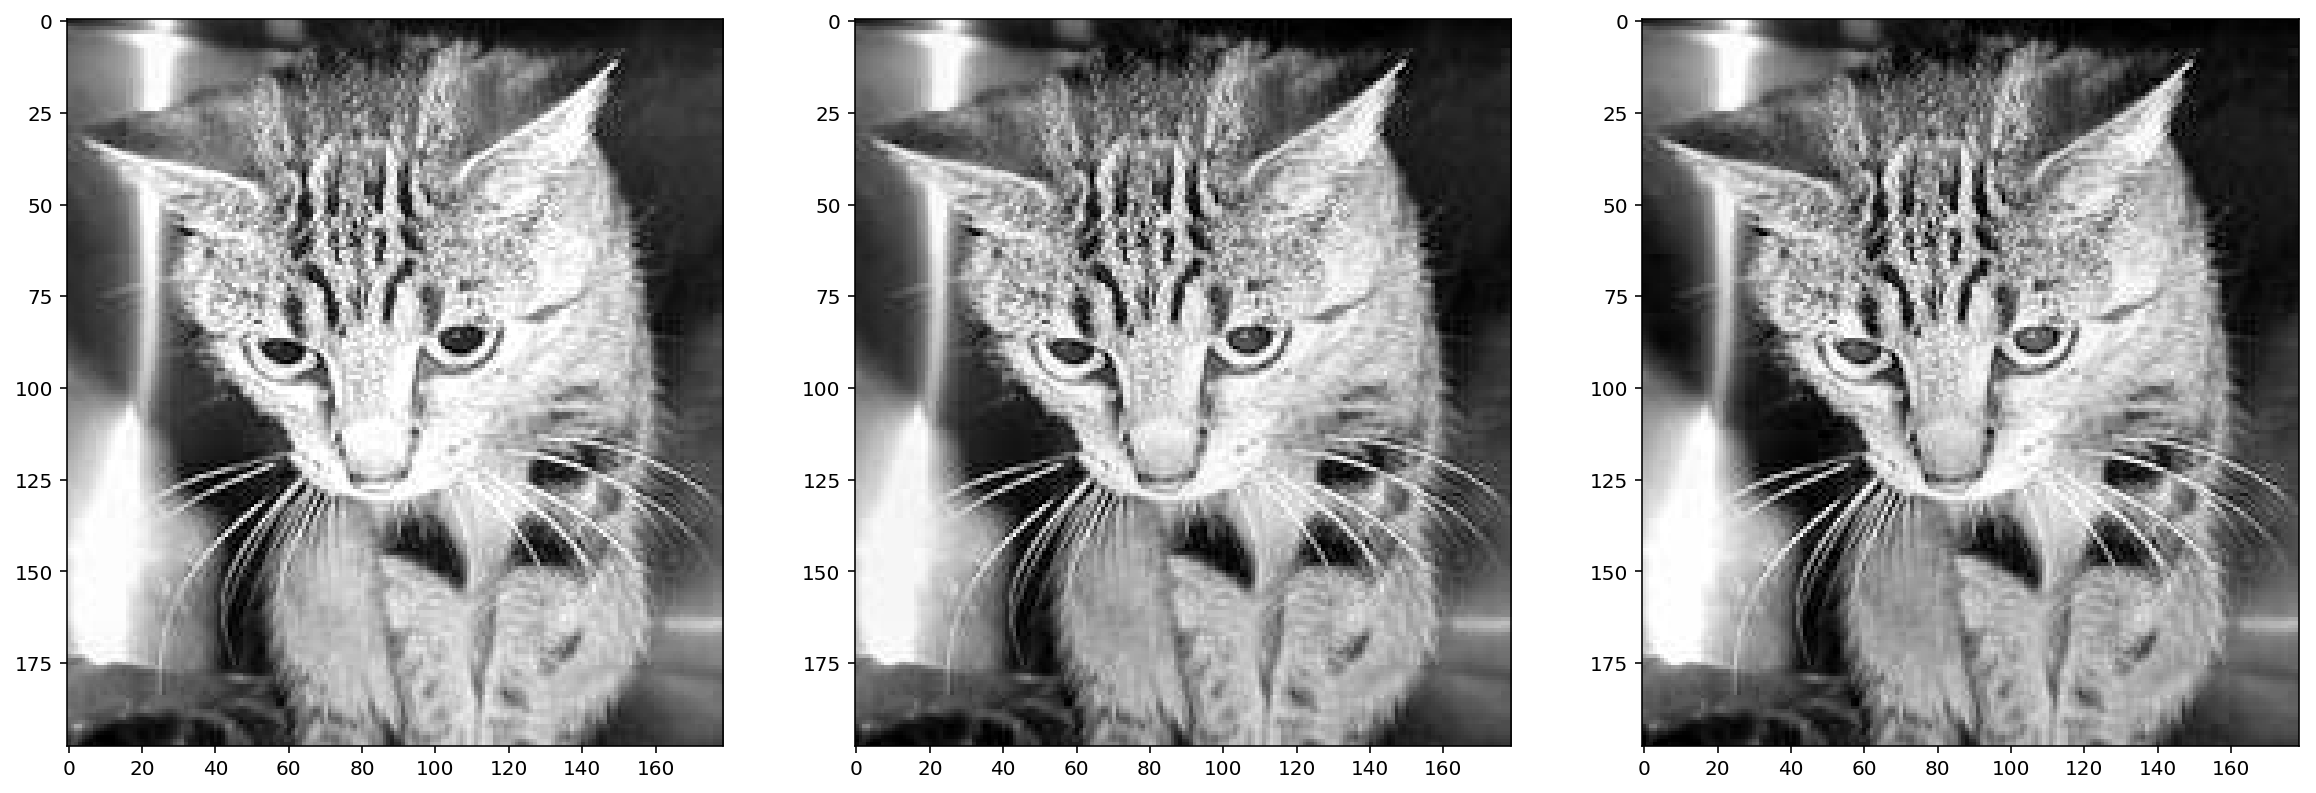

In [13]:
# Componentes RGB
f, ax = plt.subplots(1, 3, figsize=(20,10))
for i in range(3):
    ax[i].imshow(image[:,:,i], cmap='gray')
plt.show()

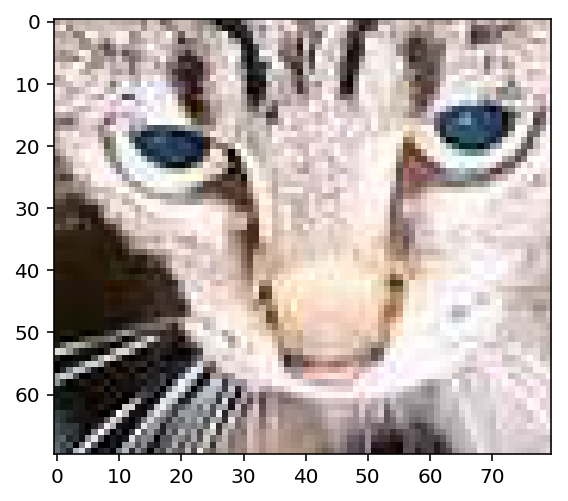

In [14]:
# Cropeo de imagenes
y_top = 70
y_bottom = 140
x_left = 40
x_right = 120
plt.imshow(image[y_top:y_bottom,x_left:x_right,:])
plt.show()

# Nuestro primer modelo

En el 2012 el accuracy estaba en el orden del 80%

In [15]:
from fastai.vision import * 
from fastai import *

In [16]:
path

'./dogscats'

In [17]:
! ls {path}

models	sample	test1  train  valid


In [84]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, padding_mode='border', test='test1', size=224)

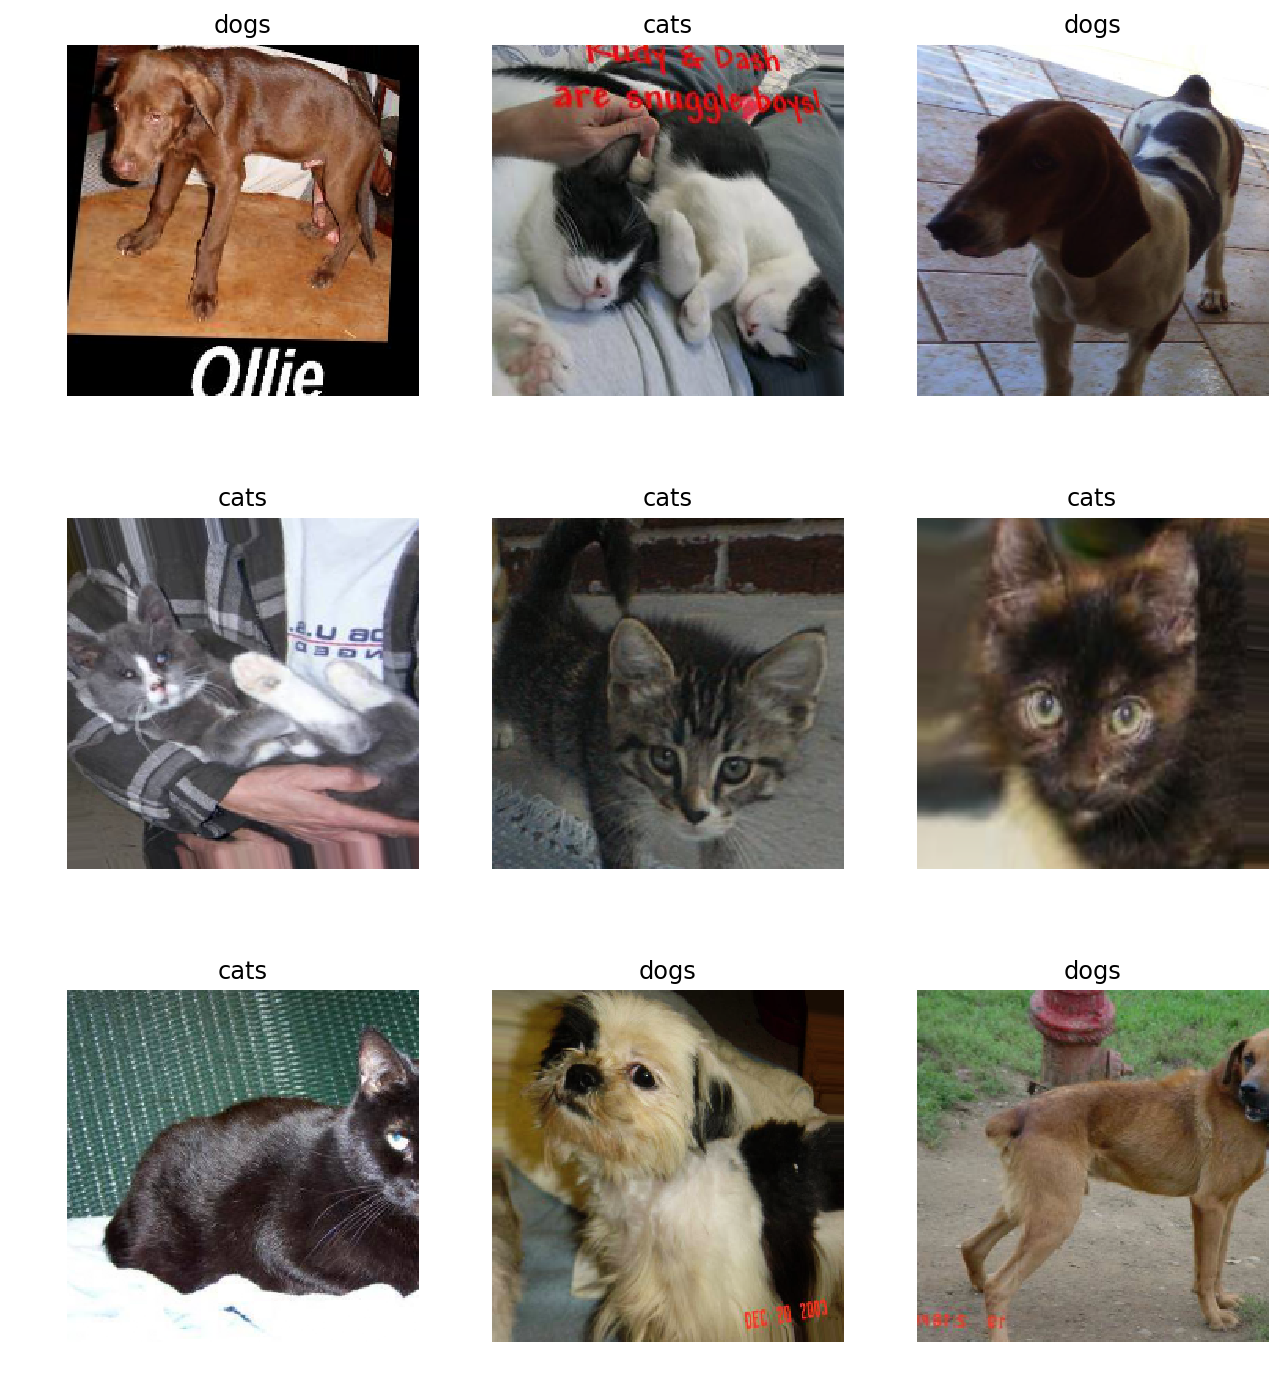

In [75]:
data.show_batch(rows=3)

In [35]:
learn = learner.create_cnn(data, models.resnet34, metrics=[accuracy])

In [36]:
learn.fit(2)

Total time: 01:52
epoch  train_loss  valid_loss  accuracy
1      0.051122    0.028971    0.989500  (00:56)
2      0.042496    0.029907    0.989500  (00:56)



### Diferencia entre función de costo (loss) y métrica

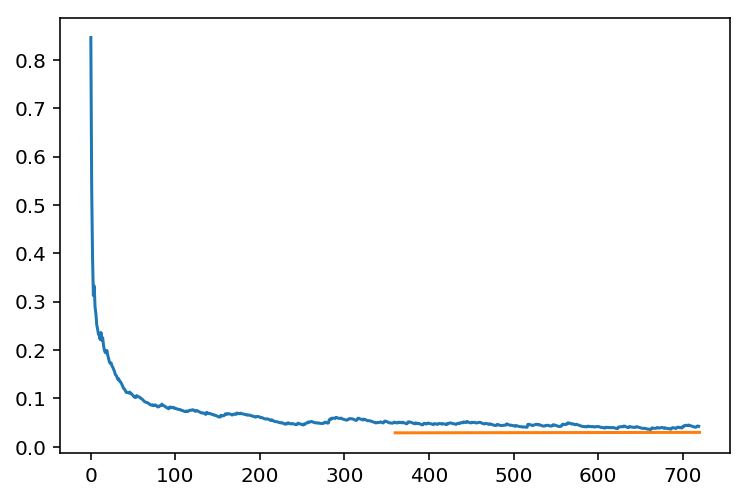

In [37]:
learn.recorder.plot_losses()

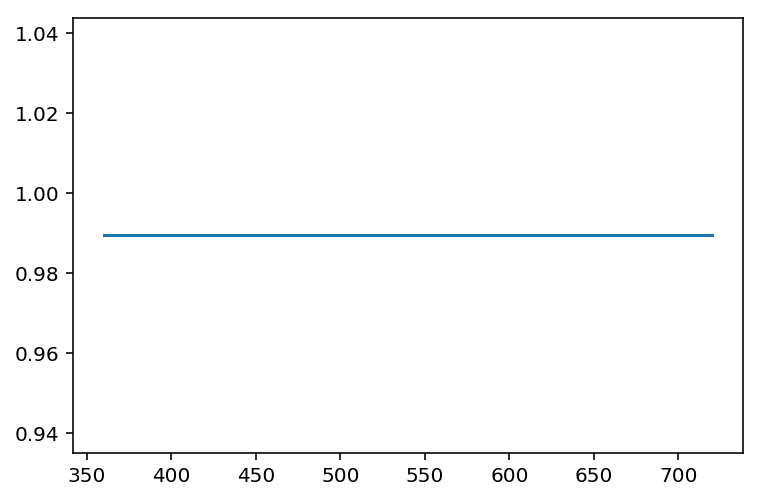

In [38]:
learn.recorder.plot_metrics()

# Interpretación de la Clasificación

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

## Ordenados de peor loss a mejor

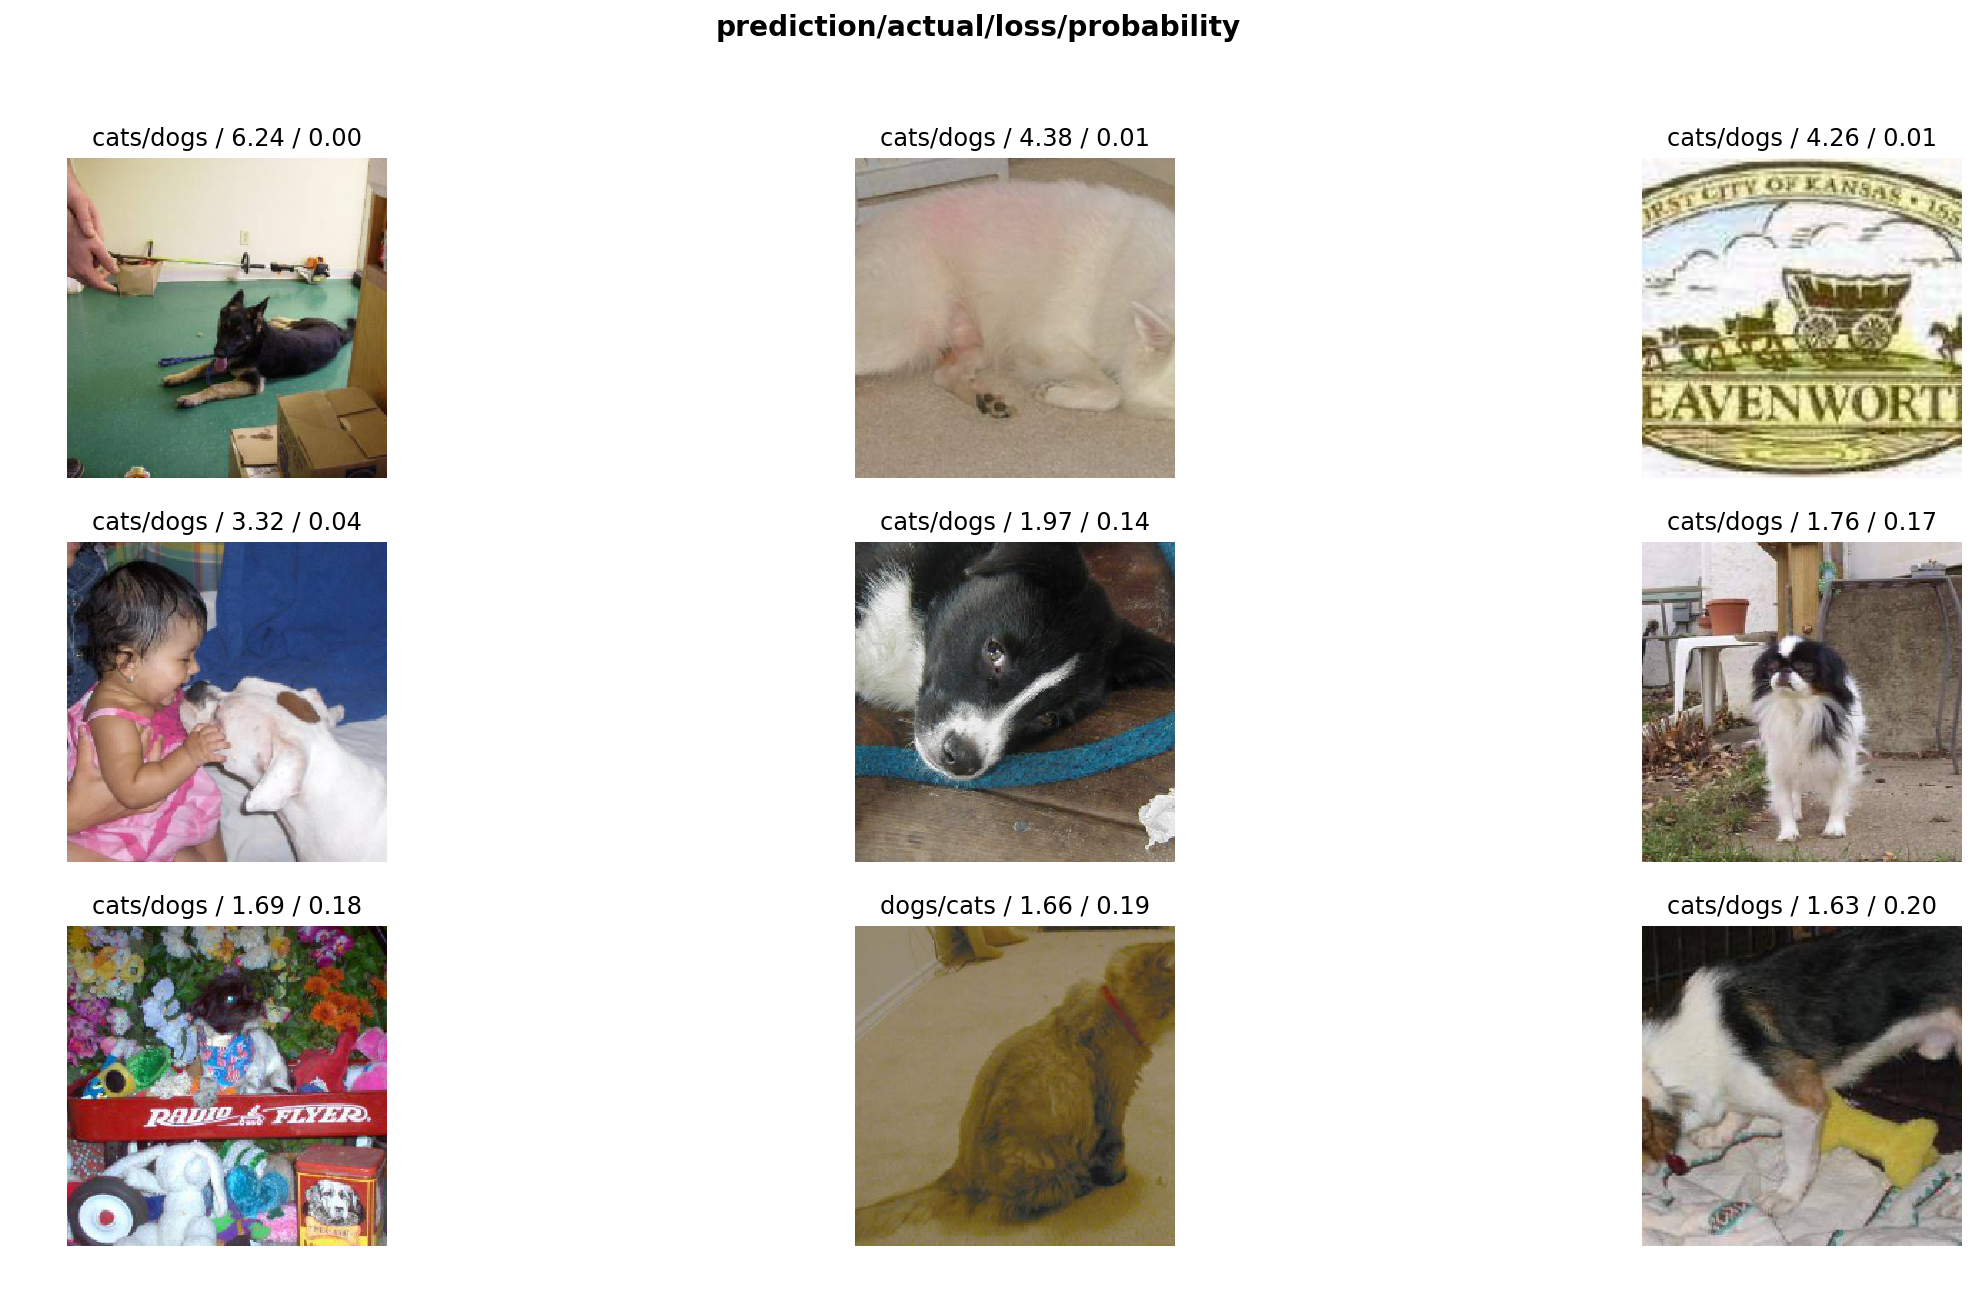

In [40]:
interp.plot_top_losses(9, figsize=(20,10), largest=True)

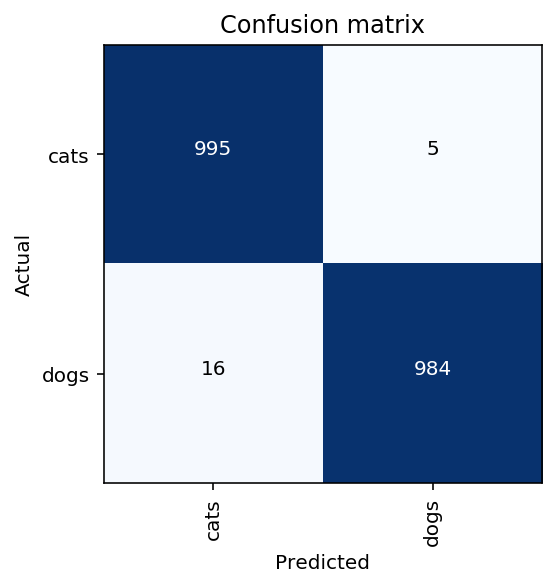

In [41]:
interp.plot_confusion_matrix()

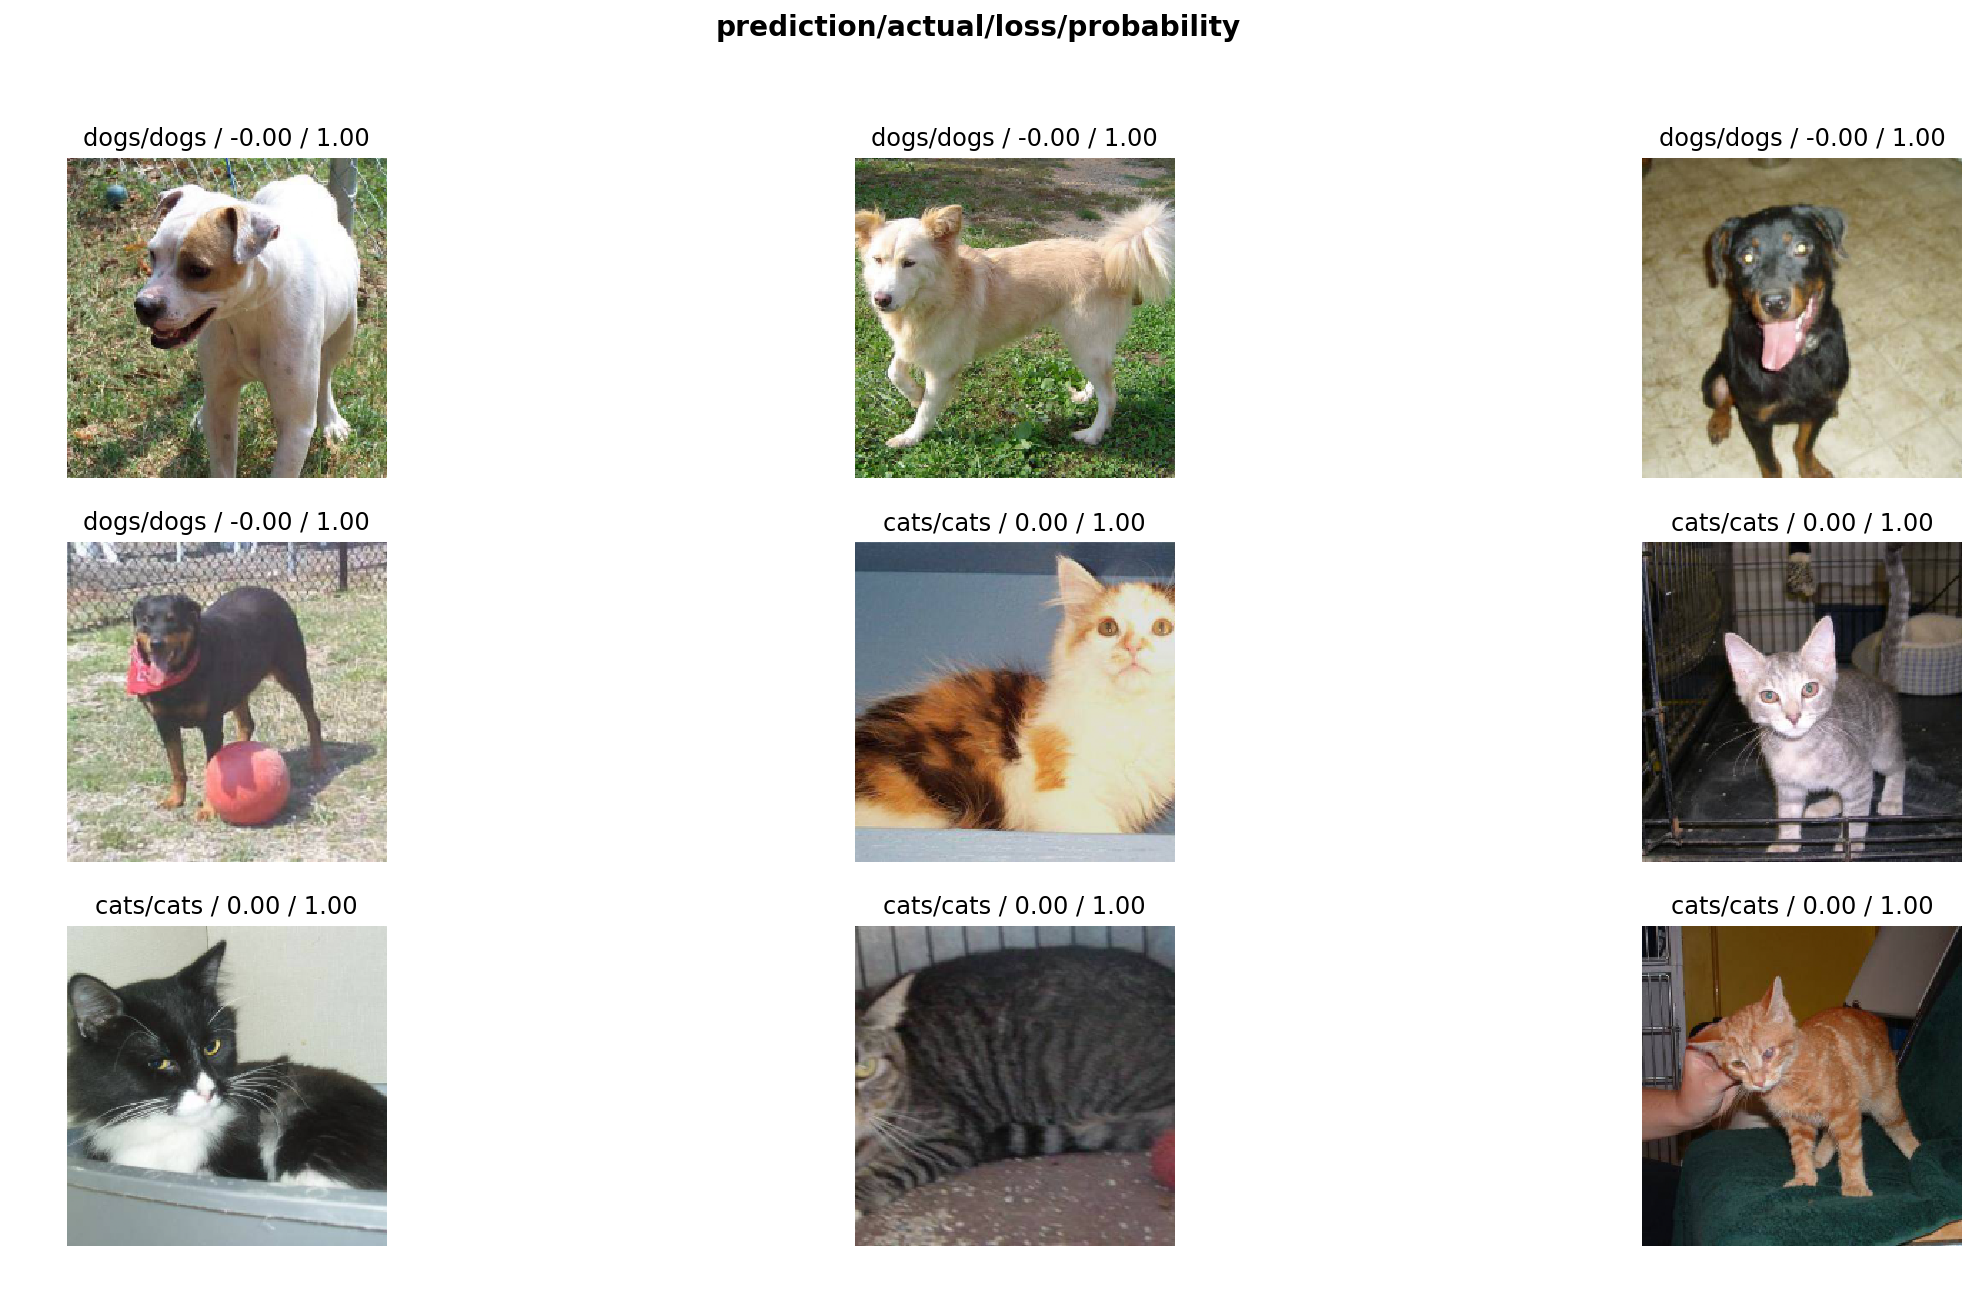

In [87]:
interp.plot_top_losses(9, figsize=(20,10), largest=False)

# Predicción

In [55]:
learn.pred_batch()[:10]

tensor([[1.0000, 0.0000],
        [0.9999, 0.0001],
        [0.9987, 0.0014],
        [0.9940, 0.0060],
        [0.9997, 0.0003],
        [0.9995, 0.0005],
        [0.9999, 0.0001],
        [1.0000, 0.0000],
        [0.9999, 0.0001],
        [0.9343, 0.0657]])

In [52]:
data.ds.class2idx

{'cats': 0, 'dogs': 1}

In [53]:
data.valid_ds.ds.x

array([PosixPath('dogscats/valid/cats/cat.12358.jpg'), PosixPath('dogscats/valid/cats/cat.9955.jpg'),
       PosixPath('dogscats/valid/cats/cat.6892.jpg'), PosixPath('dogscats/valid/cats/cat.6946.jpg'), ...,
       PosixPath('dogscats/valid/dogs/dog.4815.jpg'), PosixPath('dogscats/valid/dogs/dog.6875.jpg'),
       PosixPath('dogscats/valid/dogs/dog.9.jpg'), PosixPath('dogscats/valid/dogs/dog.2494.jpg')], dtype=object)

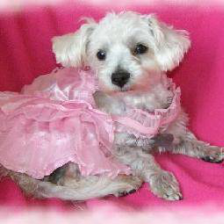

In [85]:
data.test_ds[0][0]

In [86]:
learn.predict(data.test_ds[0][0])

('dogs', tensor(1), tensor([0.0001, 0.9999]))

# Que hay atras de todo esto?

- Arquitectura de una CNN
- Minimización de una función de costo con Gradient Descent u otro optimizador
- Selección de parametros del optimizador (lr, momentum)
- Regularización: BatchNormalization, Dropout, L1, L2?
- Data Augmentation
- Transfer Learning

In [28]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

# Hiperparametros vs Parámetros

- Parametros: Lo que el modelo aprende a través de la minimización de la función de costo y luego son necesarios para la ejecución de la predicción
- Hiperparámetros: Normalmente ajustados manualemente aunque ultimamente surgieron técnicas para encontrarlos eficientemente. Suelen formar parte solo del proceso de entrenamiento, aunque algunos son explicitamente la definición de las arquitecturas del modelo

- Importancia
- Escala log o lineal?

Parametros  
- Pesos de interconexión entre neuronas (w)
- Bias de neuronas (b)

Hyperparametros  
- Cantidad de capas
- Cantidad de unidades por capas
- Funciones de activación
- Learning rates
- Optimizadores
- Batch-size
- Inicialización
- Momentum
- Probabilidad de dropout
- Parámetros de regularización L2, L1, etc

# Que pasa si cambio estos parametros?
## 1cycle policy

In [89]:
learn2 = learner.create_cnn(data, models.resnet34, metrics=[accuracy])

In [90]:
learn2.fit_one_cycle(2)

Total time: 01:52
epoch  train_loss  valid_loss  accuracy
1      0.052846    0.031987    0.989000  (00:55)
2      0.030232    0.021002    0.991500  (00:56)



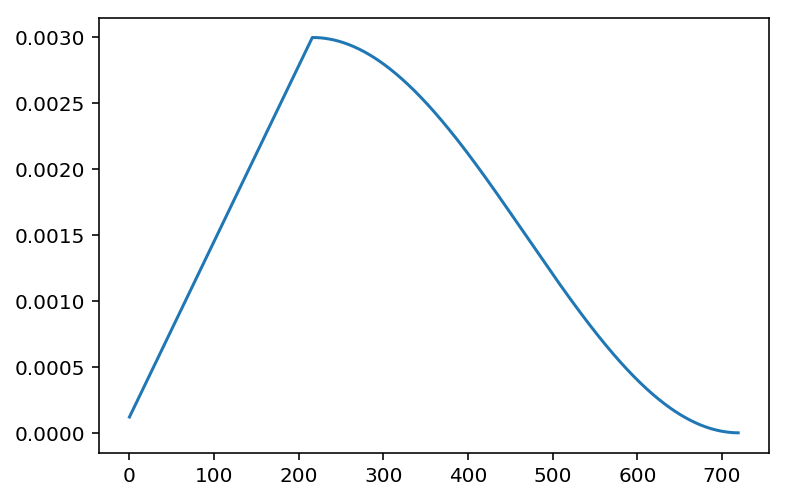

In [91]:
learn2.recorder.plot_lr()

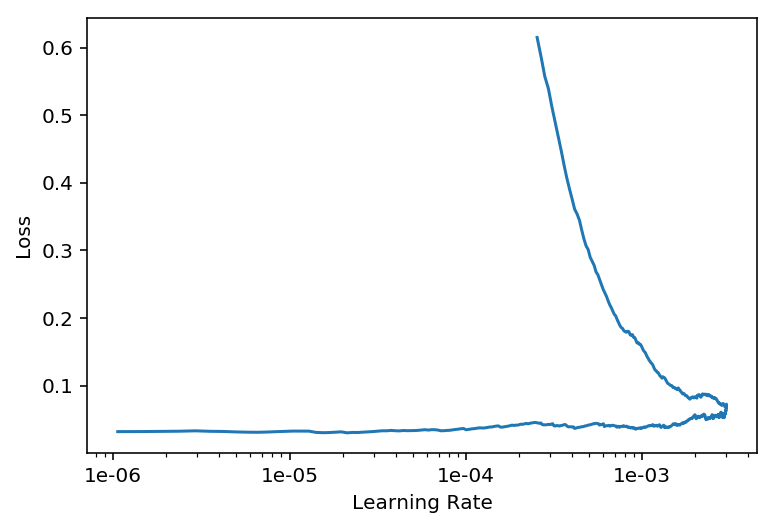

In [93]:
learn2.recorder.plot()

In [94]:
interp2 = ClassificationInterpretation.from_learner(learn2)

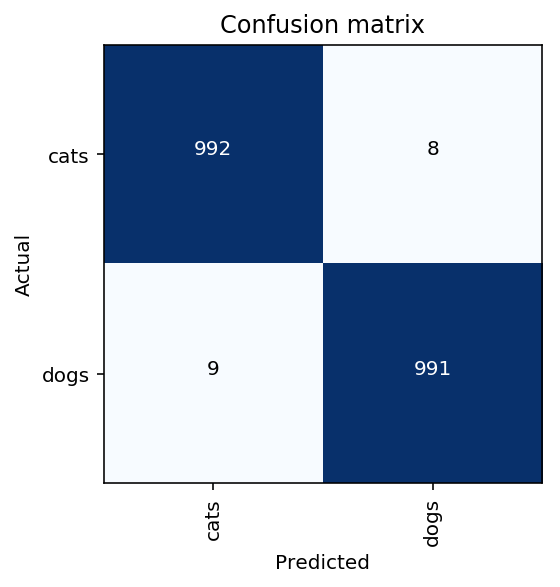

In [96]:
interp2.plot_confusion_matrix()

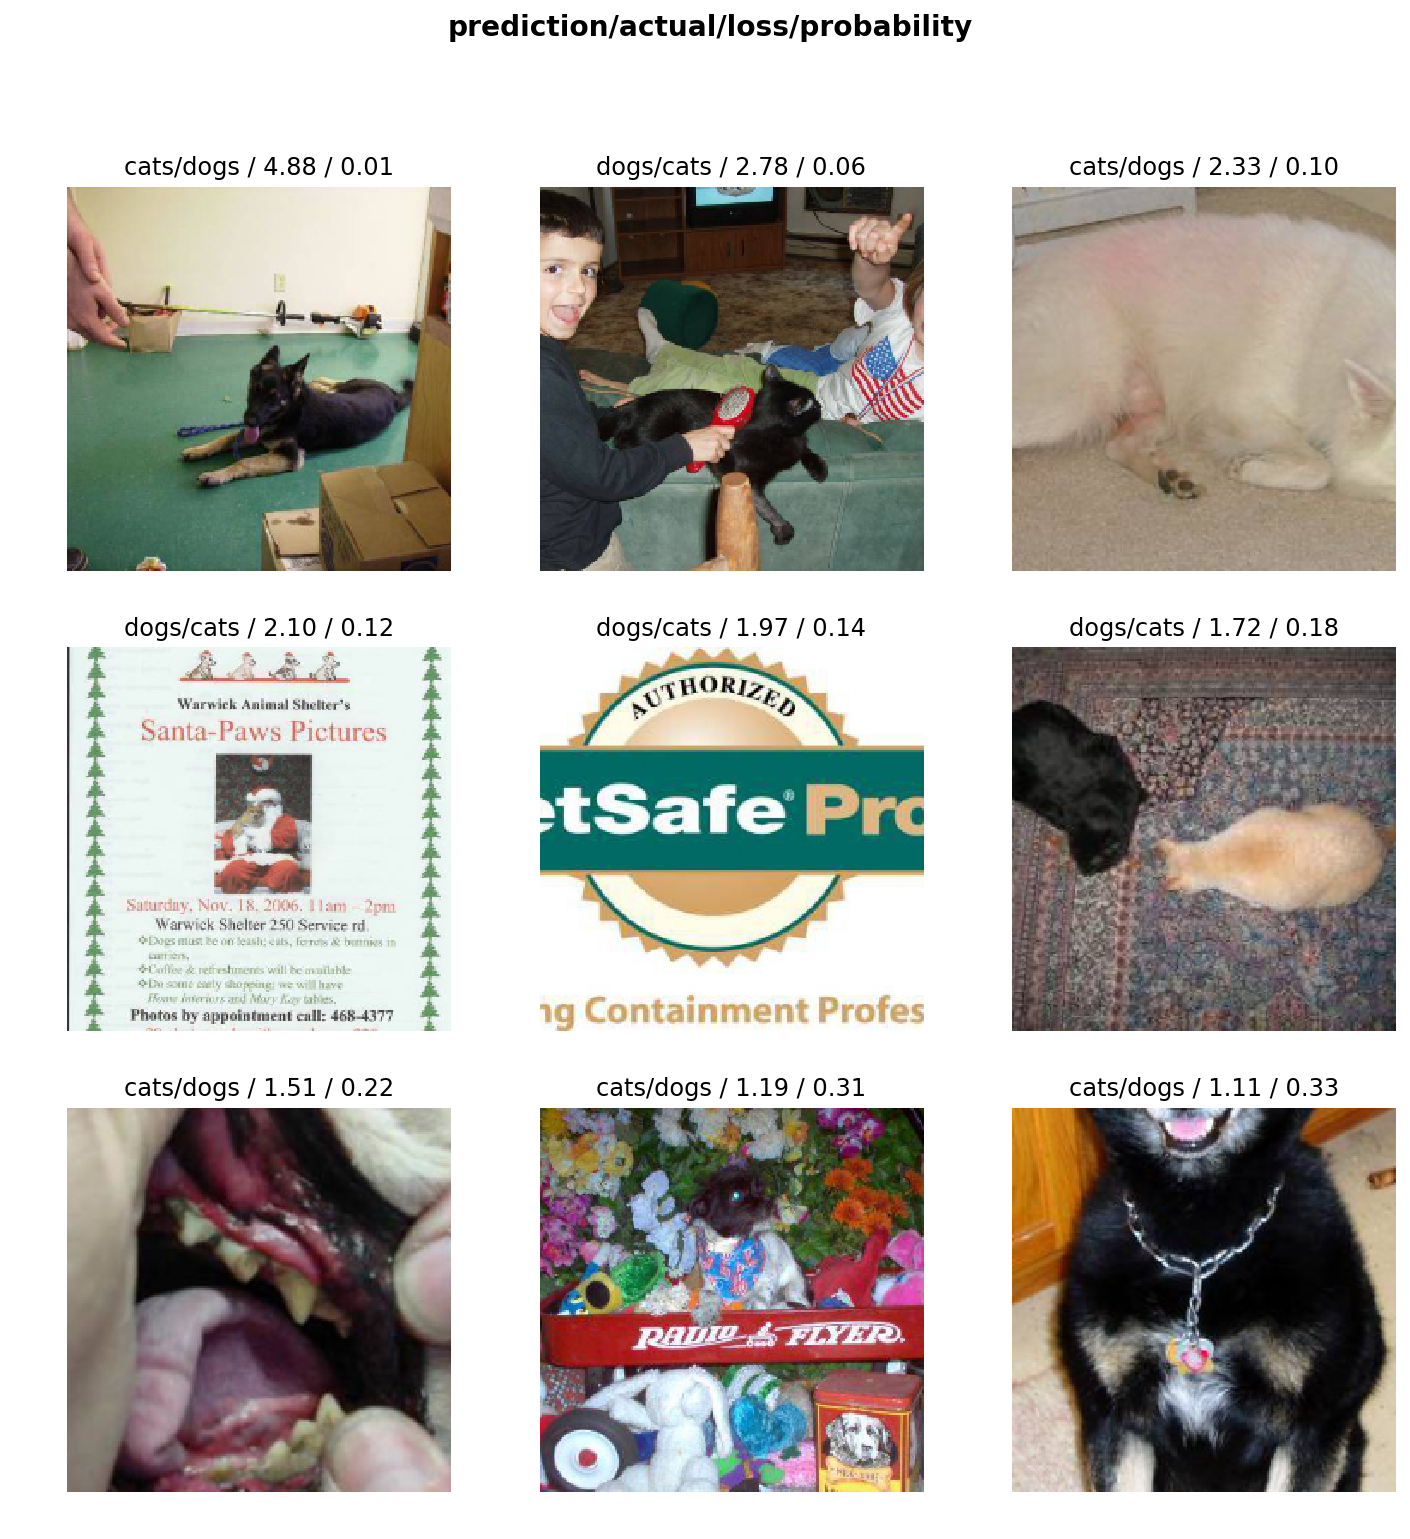

In [98]:
interp2.plot_top_losses(9)